In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe
from matplotlib.ticker import FormatStrFormatter

import utils

import corner

In [2]:
name_A = 'Luhman 16A'; name_B = 'Luhman 16B' # name_A = 'WISE 1049A'; name_B = 'WISE 1049B'
#color_A = '0.45'; color_B = '0.0'
lw_d = 0.8

#color_m = 'C1'
#color_m_A = 'C0'; color_m_B = 'C3'
#color_m_A = '#FF7B2E'; color_m_B = '#396ED8'
#color_A = '#FF7B2E'; color_B = '#396ED8'
#color_m_A = '#FF4A2E'; color_m_B = '#396ED8'
#color_A = '#FF4A2E'; color_B = '#396ED8'
lw_m = 1.0

In [3]:
Res_A = utils.RetrievalResults(
    prefix='../retrieval_outputs/fiducial_J_A_ret_15_1column_n1000/test_', 
    m_set='J1226_A', w_set='J1226', load_posterior=True
    )

Res_B = utils.RetrievalResults(
    #prefix='../retrieval_outputs/fiducial_J_B_ret_36/test_', 
    prefix='../retrieval_outputs/fiducial_J_B_ret_51_1column_n1000/test_', 
    m_set='J1226_A', w_set='J1226', load_posterior=True
    )

  analysing data from ../retrieval_outputs/fiducial_J_A_ret_15_1column_n1000/test_.txt
['modes', 'nested sampling global log-evidence', 'nested sampling global log-evidence error', 'global evidence', 'global evidence error', 'nested importance sampling global log-evidence', 'nested importance sampling global log-evidence error', 'marginals']
1399128.9058026907
1399123.4062811895
1399123.4062811895
  analysing data from ../retrieval_outputs/fiducial_J_B_ret_51_1column_n1000/test_.txt
['modes', 'nested sampling global log-evidence', 'nested sampling global log-evidence error', 'global evidence', 'global evidence error', 'nested importance sampling global log-evidence', 'nested importance sampling global log-evidence error', 'marginals']
1395569.7135439706
1395556.204842826
1395556.204842826


In [4]:
color_m_A = '#FF622E'; color_m_B = '#396ED8'
color_A = '#FF622E'; color_B = '#396ED8'

cmap_m_A = mpl.colors.LinearSegmentedColormap.from_list('', ['w',color_m_A])
env_colors_m_A = cmap_m_A([0,1/3,2/3,1])
env_colors_m_A[:,3] = 0.5
env_colors_m_A[0,3] = 0.0

cmap_m_B = mpl.colors.LinearSegmentedColormap.from_list('', ['w',color_m_B])
env_colors_m_B = cmap_m_B([0,1/3,2/3,1])
env_colors_m_B[:,3] = 0.5
env_colors_m_B[0,3] = 0.0

In [18]:
O_H_solar = 8.69-12
F_H_solar = 4.40-12
Na_H_solar = 6.22-12
K_H_solar = 5.07-12

VMR_He = 0.15
VMR_tot_wo_H2 = VMR_He + np.sum(10**Res_B.posterior[:,[9,12,13,14,15]], axis=-1)
VMR_H2 = 1 - VMR_tot_wo_H2

VMR_H = 2*VMR_H2 + 10**Res_B.posterior[:,12]*2 + 10**Res_B.posterior[:,9] + 10**Res_B.posterior[:,13]

O_H  = np.log10(10**Res_B.posterior[:,12] / VMR_H) - O_H_solar
F_H  = np.log10(10**Res_B.posterior[:,13] / VMR_H) - F_H_solar
Na_H = np.log10(10**Res_B.posterior[:,15] / VMR_H) - Na_H_solar
K_H  = np.log10(10**Res_B.posterior[:,14] / VMR_H) - K_H_solar

print(np.median(O_H), np.median(F_H), np.median(Na_H), np.median(K_H))

-1.0079107761863817 -0.5377861528164125 -0.27715927666176743 -0.5533936389359084


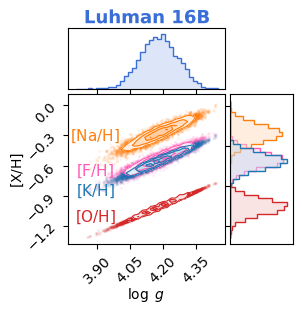

In [37]:
posterior_ranges = [(3.8,4.45),(-1.32,0.05)]; bins = 35
#posterior_ranges = [(3.8,5.0),(-1.35,0.08)]; bins = 40
labels = [r'$\log\ g$', r'$[\mathrm{X/H}]$']

colors = ['C3', '#FF59B4', 'C1', 'C0']

#fig = plt.figure(figsize=(3.8,3.8))
fig = plt.figure(figsize=(3.8,3))
#'''

kwargs = dict(
    bins=bins, 
    range=posterior_ranges, 
    
    fill_contours=True, 
    plot_datapoints=True, 
    
    labels=labels, 
    #show_titles=True, 
    use_math_text=True, 
    title_fmt='.2f', 
    title_kwargs={'fontsize':10},#, 'loc':'left', 'x':0.05}, 
    #labelpad=0.03, 
    labelpad=-0.03, 
    
    #smooth=True, 
)

for i, met in enumerate([O_H, F_H, Na_H, K_H]):

    cmap = mpl.colors.LinearSegmentedColormap.from_list('', ['w',colors[i]])
    env_colors = cmap([0,1/4,2/4,3/4,1])
    env_colors[:,3] = 0.5; env_colors[0,3] = 0.0

    kwargs['color'] = colors[i]
    kwargs['hist_kwargs'] = {
        'edgecolor':colors[i], 'facecolor':env_colors[1], 'fill':True, 'density':True, 
        #'orientation':'horizontal', 
        }
    kwargs['contourf_kwargs'] = {'colors':env_colors}
    kwargs['contour_kwargs']  = {'linewidths':0.8, 'colors':colors[i]}

    fig = corner.corner(
        fig=fig, 
        data=np.array([Res_B.posterior[:,2],met]).T, 
        **kwargs
    )

# Reshape the axes to a square matrix
ax = np.array(fig.axes)
ax = ax.reshape((int(np.sqrt(len(ax))), int(np.sqrt(len(ax)))))

#ax_VMR.errorbar(
#    x=np.median(FeH_envelope_A2[6]), xerr=2e-7, y=0.2, 
#    transform=ax_VMR.get_xaxis_transform(), 
#    fmt='|', xuplims=True, color=color_m_A2, markersize=6
#)
q = np.array([
    0.5-0.997/2, 0.5-0.95/2, 0.5-0.68/2, 0.5, 
    0.5+0.68/2, 0.5+0.95/2, 0.5+0.997/2
    ])

ax[0,0].annotate(
    name_B, xy=(0.5,1.02), xycoords='axes fraction', 
    ha='center', va='bottom', c=color_m_B, fontsize=13, fontweight='bold', 
    path_effects=[pe.withStroke(linewidth=2, foreground='w', alpha=0.8)]
    )

for i, patch_i in enumerate(list(ax[0,0].patches)):
    patch_i.set_facecolor('none')
    patch_i.set_edgecolor('none')
    if i == 0:
        patch_i.set_facecolor(env_colors_m_B[1])
        patch_i.set_edgecolor(color_m_B)

for i, (label_i, X_H_i) in enumerate(
    zip([r'$[\mathrm{O/H}]$', r'$[\mathrm{F/H}]$', r'$[\mathrm{Na/H}]$', r'$[\mathrm{K/H}]$'], 
        [-1.1,-0.65,-0.3,-0.85])
    ):
    colors[i]
    ax[1,0].annotate(label_i, xy=(0.17,X_H_i), xycoords=ax[1,0].get_yaxis_transform(), color=colors[i], ha='center', va='center', fontsize=11)

'''
for i, label_i in enumerate(
    [r'$[\mathrm{O/H}]$', r'$[\mathrm{F/H}]$', r'$[\mathrm{Na/H}]$', r'$[\mathrm{K/H}]$']
    ):
    cmap = mpl.colors.LinearSegmentedColormap.from_list('', ['w',colors[i]])
    env_colors = cmap([0,1/3,2/3,1])
    env_colors[:,3] = 0.5; env_colors[0,3] = 0.0

    ax[1,1].fill_between(
        x=[0.0], y1=[np.nan], y2=[np.nan], fc=env_colors[1], ec=colors[i], label=label_i
    )
ax[1,1].legend(
    loc='lower left', bbox_to_anchor=(1.0,0.0), frameon=False, 
    handlelength=0.9, handletextpad=0.5, labelspacing=0.5, 
    labelcolor=colors, prop={'weight':'bold', 'size':12}, 
)
'''

# Rotate the axis and apply height/width ratios
for i, patch_i in enumerate(list(ax[1,1].patches)):
    patch_i.set_xy(np.array([patch_i.xy[:,1],patch_i.xy[:,0]]).T)

xlim, ylim = ax[1,1].get_xlim(), ax[1,1].get_ylim()
ax[1,1].set(yticks=ax[1,1].get_xticks(), xticks=ax[1,1].get_yticks())
ax[1,1].set(ylim=xlim, xlim=ylim, xlabel=None)

gs = ax[0,0].get_gridspec()
gs.set_height_ratios([1,2.5]); gs.set_width_ratios([2.5,1])
gs.update()

#plt.subplots_adjust(left=0.18, bottom=0.18, right=0.96, top=0.96)
plt.subplots_adjust(left=0.16, bottom=0.20, right=0.75, top=0.92)
plt.savefig('./plots/log_g_corner.pdf')
plt.show(fig)

In [11]:
O_H_solar = 8.69-12
F_H_solar = 4.40-12
Na_H_solar = 6.22-12
K_H_solar = 5.07-12

VMR_He = 0.15
VMR_tot_wo_H2 = VMR_He + np.sum(10**Res_A.posterior[:,[9,12,13,14,15]], axis=-1)
VMR_H2 = 1 - VMR_tot_wo_H2

VMR_H = 2*VMR_H2 + 10**Res_A.posterior[:,12]*2 + 10**Res_A.posterior[:,9] + 10**Res_A.posterior[:,13]

O_H  = np.log10(10**Res_A.posterior[:,12] / VMR_H) - O_H_solar
F_H  = np.log10(10**Res_A.posterior[:,13] / VMR_H) - F_H_solar
Na_H = np.log10(10**Res_A.posterior[:,15] / VMR_H) - Na_H_solar
K_H  = np.log10(10**Res_A.posterior[:,14] / VMR_H) - K_H_solar

print(np.median(O_H), np.median(F_H), np.median(Na_H), np.median(K_H))

-1.6392832198391831 -1.2254739693054075 -0.8406356302915934 -1.0936291269657366


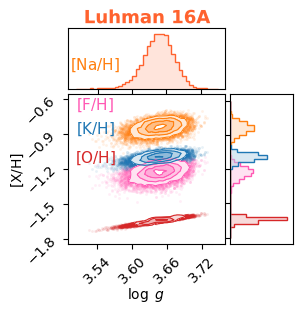

In [17]:
posterior_ranges = [(3.5,3.75),(-1.8,-0.6)]; bins = 40
#posterior_ranges = [(3.8,5.0),(-1.35,0.08)]; bins = 40
labels = [r'$\log\ g$', r'$[\mathrm{X/H}]$']

colors = ['C3', '#FF59B4', 'C1', 'C0']

#fig = plt.figure(figsize=(3.8,3.8))
fig = plt.figure(figsize=(3.8,3))
#'''

kwargs = dict(
    bins=bins, 
    range=posterior_ranges, 
    
    fill_contours=True, 
    plot_datapoints=True, 
    
    labels=labels, 
    #show_titles=True, 
    use_math_text=True, 
    title_fmt='.2f', 
    title_kwargs={'fontsize':10},#, 'loc':'left', 'x':0.05}, 
    #labelpad=0.03, 
    labelpad=-0.03, 
)

for i, met in enumerate([O_H, F_H, Na_H, K_H]):

    cmap = mpl.colors.LinearSegmentedColormap.from_list('', ['w',colors[i]])
    env_colors = cmap([0,1/3,2/3,1])
    env_colors[:,3] = 0.5; env_colors[0,3] = 0.0

    kwargs['color'] = colors[i]
    kwargs['hist_kwargs'] = {
        'edgecolor':colors[i], 'facecolor':env_colors[1], 'fill':True, 'density':True, 
        #'orientation':'horizontal', 
        }
    kwargs['contourf_kwargs'] = {'colors':env_colors}
    kwargs['contour_kwargs']  = {'linewidths':0.8, 'colors':colors[i]}

    fig = corner.corner(
        fig=fig, 
        data=np.array([Res_A.posterior[:,2],met]).T, 
        **kwargs
    )

# Reshape the axes to a square matrix
ax = np.array(fig.axes)
ax = ax.reshape((int(np.sqrt(len(ax))), int(np.sqrt(len(ax)))))

#ax_VMR.errorbar(
#    x=np.median(FeH_envelope_A2[6]), xerr=2e-7, y=0.2, 
#    transform=ax_VMR.get_xaxis_transform(), 
#    fmt='|', xuplims=True, color=color_m_A2, markersize=6
#)
q = np.array([
    0.5-0.997/2, 0.5-0.95/2, 0.5-0.68/2, 0.5, 
    0.5+0.68/2, 0.5+0.95/2, 0.5+0.997/2
    ])

ax[0,0].annotate(
    name_A, xy=(0.5,1.02), xycoords='axes fraction', 
    ha='center', va='bottom', c=color_m_A, fontsize=13, fontweight='bold', 
    path_effects=[pe.withStroke(linewidth=2, foreground='w', alpha=0.8)]
    )

for i, patch_i in enumerate(list(ax[0,0].patches)):
    patch_i.set_facecolor('none')
    patch_i.set_edgecolor('none')
    if i == 0:
        patch_i.set_facecolor(env_colors_m_A[1])
        patch_i.set_edgecolor(color_m_A)

for i, (label_i, X_H_i) in enumerate(
    zip([r'$[\mathrm{O/H}]$', r'$[\mathrm{F/H}]$', r'$[\mathrm{Na/H}]$', r'$[\mathrm{K/H}]$'], 
        [-1.1,-0.65,-0.3,-0.85])
    ):
    colors[i]
    ax[1,0].annotate(label_i, xy=(0.17,X_H_i), xycoords=ax[1,0].get_yaxis_transform(), color=colors[i], ha='center', va='center', fontsize=11)

'''
for i, label_i in enumerate(
    [r'$[\mathrm{O/H}]$', r'$[\mathrm{F/H}]$', r'$[\mathrm{Na/H}]$', r'$[\mathrm{K/H}]$']
    ):
    cmap = mpl.colors.LinearSegmentedColormap.from_list('', ['w',colors[i]])
    env_colors = cmap([0,1/3,2/3,1])
    env_colors[:,3] = 0.5; env_colors[0,3] = 0.0

    ax[1,1].fill_between(
        x=[0.0], y1=[np.nan], y2=[np.nan], fc=env_colors[1], ec=colors[i], label=label_i
    )
ax[1,1].legend(
    loc='lower left', bbox_to_anchor=(1.0,0.0), frameon=False, 
    handlelength=0.9, handletextpad=0.5, labelspacing=0.5, 
    labelcolor=colors, prop={'weight':'bold', 'size':12}, 
)
'''

# Rotate the axis and apply height/width ratios
for i, patch_i in enumerate(list(ax[1,1].patches)):
    patch_i.set_xy(np.array([patch_i.xy[:,1],patch_i.xy[:,0]]).T)

xlim, ylim = ax[1,1].get_xlim(), ax[1,1].get_ylim()
ax[1,1].set(yticks=ax[1,1].get_xticks(), xticks=ax[1,1].get_yticks())
ax[1,1].set(ylim=xlim, xlim=ylim, xlabel=None)

gs = ax[0,0].get_gridspec()
gs.set_height_ratios([1,2.5]); gs.set_width_ratios([2.5,1])
gs.update()

#plt.subplots_adjust(left=0.18, bottom=0.18, right=0.96, top=0.96)
plt.subplots_adjust(left=0.16, bottom=0.20, right=0.75, top=0.92)
plt.savefig('./plots/log_g_corner.pdf')
plt.show(fig)